# By: Chikkala Siva Lalitha Devi

# Data Science and Business Analytics Internship

# The Sparks Foundation

# GRIP JUNE2021

# Task 1-To predict the percentage obtained by a student based on the no. of study hours

# Problem Statement-What will be predicted score if a student studies for 9.25 hrs/ day?

# Step 1-Importing Required Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

# Step 2-Importing the Dataset

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

# Step 3-Data Preprocessing

In [3]:
data.head() #Reading the first five rows of the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape #To check the no. of rows and the no. of columns in the dataset

(25, 2)

In [5]:
data.columns #To identify the name of the columns in the dataset

Index(['Hours', 'Scores'], dtype='object')

In [6]:
data.dtypes #To check the datatype of each column in the dataset

Hours     float64
Scores      int64
dtype: object

In [7]:
data.isnull().any() #To check whether there are any null values in any of the columns

Hours     False
Scores    False
dtype: bool

In [8]:
data.isnull().sum() #Sum of the null values in the columns

Hours     0
Scores    0
dtype: int64

In [9]:
data.describe() #Statistical information about the dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.info() #Additional information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Step 4-Data Visualization

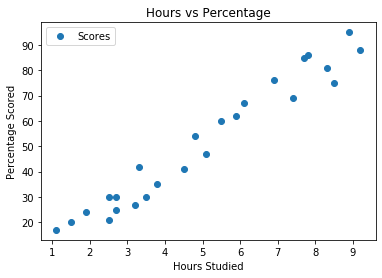

In [11]:
# Plotting the distribution of scores to understand the relation between the data columns.
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

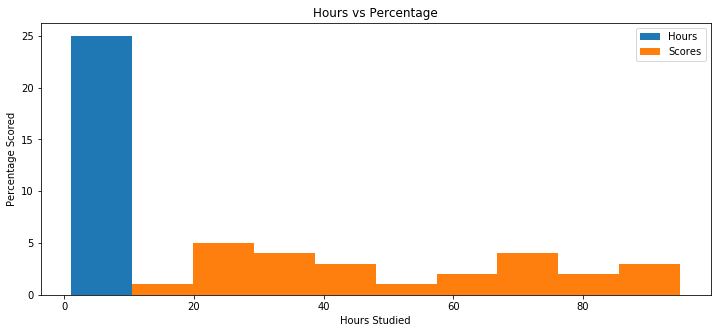

In [12]:
#Histogram showing the distribution of Hours Studied Vs Percentage Scored
data.plot(kind='hist', figsize=(12, 5))
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

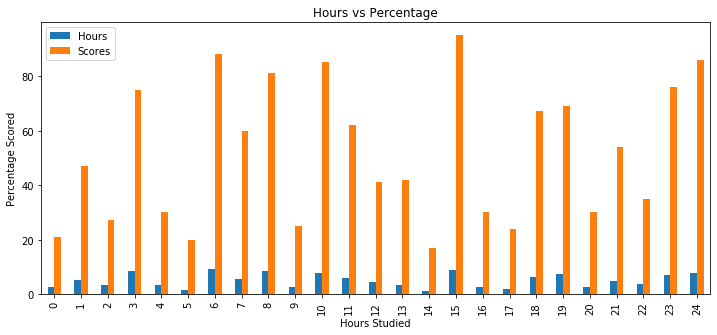

In [13]:
#Bar Chart showing the distribution of Hours Studied Vs Percentage Scored
data.plot(kind='bar',figsize=(12,5))
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

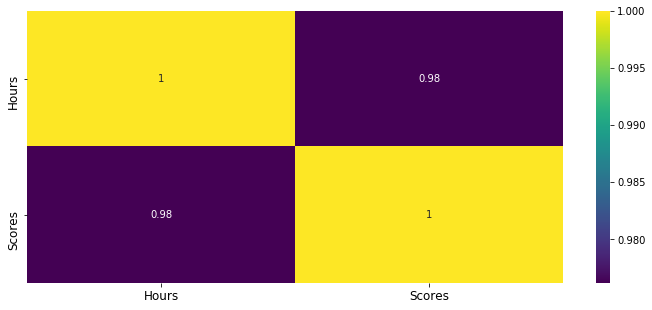

In [14]:
# Checking the correlations between the data columns with the help of a heatmap
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(),annot=True,cmap="viridis")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Step 5-Separating the input and output data

In [15]:
#Defining the input column(Hours Studied)
X=data.iloc[:,0:1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [16]:
#Defining the output column(Percentage Scored)
y= data.iloc[:,1:].values
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

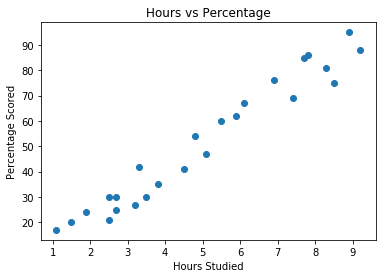

In [17]:
#Scatter Plot Showing the correlation between the input column(Hours Studied) and the output column(Percentage Scored)
plt.scatter(X,y)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

As we can see that there is a linear relationship between the input and the output column involving two variables so we use simple linear regression model for predicting the output.

# Step 6-Splitting of Training and Testing Data

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
X_train #To view the Input Column of Training Data

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [20]:
X_train.shape #Checking the no. of rows and columns present in the input column of training data

(20, 1)

In [21]:
y_train #To view the output column of training data

array([[35],
       [24],
       [86],
       [76],
       [17],
       [47],
       [85],
       [42],
       [81],
       [88],
       [67],
       [30],
       [25],
       [60],
       [30],
       [75],
       [21],
       [54],
       [95],
       [41]], dtype=int64)

In [22]:
y_train.shape #Checking the no. of rows and columns in the output column of training data

(20, 1)

In [23]:
X_test #To view the input column of testing data

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [24]:
X_test.shape #Checking the no. of rows and columns in the input column of testing data

(5, 1)

In [25]:
y_test #To view the output column of testing data

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [26]:
y_test.shape #Checking the no. of rows and columns in the output column of testing data

(5, 1)

# Step 7-Applying Simple Linear Regression Model

In [27]:
lr= LinearRegression() 

In [28]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print("The coefficient is: ",lr.coef_) #Finding the coefficient of linear regression

The coefficient is:  [[9.91065648]]


In [30]:
print("The intercept is: ",lr.intercept_) #Finding the intercept of linear regression

The intercept is:  [2.01816004]


In [31]:
# Getting the best fitted line 
line = lr.intercept_+lr.coef_*X

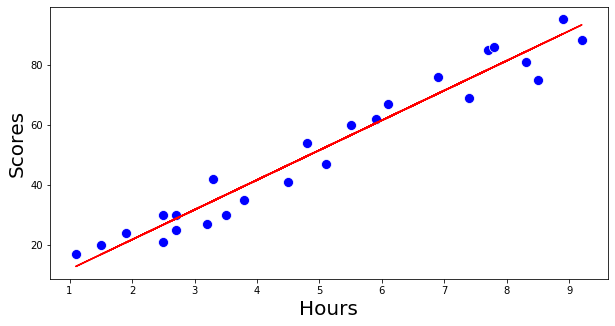

In [32]:
# Plotting the best fitted line on the graph 
plt.figure(figsize=(10,5))
sns.scatterplot(data['Hours'],data['Scores'],s=100,color='b')
plt.plot(data['Hours'],line,'r')
plt.xlabel(xlabel='Hours',fontsize=20)
plt.ylabel(ylabel='Scores',fontsize=20)
plt.show()


# Step 8-Making Predictions

In [33]:
X_test #To view the input column of testing data for generating predictions

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [34]:
y_pred=lr.predict(X_test) #To predict the output using the model

In [35]:
y_pred #To view the predictions generated by the model

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [36]:
y_test #To view the actual output before applying the model

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [37]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) #Comparison of the actual output and the predicted output
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Step 9-Evaluating the performance of the model

In [38]:
#The final step is to evaluate the performance of the algorithm. 
#This step is particularly important to compare how well different algorithms perform on a particular dataset
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [39]:
score=r2_score(y_test,y_pred) #For evaluating the efficiency of the model
score

0.9454906892105356

# Step 10-Predicting the Output

In [40]:
#Testing the model to predict the percentage of a student if he studies for 9.25 hours/day as given in the problem statement
hours = 9.25
pred = lr.predict(np.array(hours).reshape(1,-1))
print("No of Hours = ",hours)
print("Predicted Score = ",pred[0][0])

No of Hours =  9.25
Predicted Score =  93.69173248737538


# Conclusion: The predicted score(percentage) of a student who studies for 9.25 hours/day is 93.69% .